# Import Useful Packages 
In this workbook we are going to import and make use of the following data science packages.

In [25]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

## Reading Data 
We load and read csv data file using pandas package module.

In [26]:
data = pd.read_csv('data.csv')
data

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
...,...,...,...,...
164,60,105,140,290.8
165,60,110,145,300.0
166,60,115,145,310.2
167,75,120,150,320.4


## Data Summaries

In [27]:
data.head(10)

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
5,60,102,127,300.0
6,60,110,136,374.0
7,45,104,134,253.3
8,30,109,133,195.1
9,60,98,124,269.0


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  169 non-null    int64  
 1   Pulse     169 non-null    int64  
 2   Maxpulse  169 non-null    int64  
 3   Calories  164 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 5.4 KB


In [29]:
data.describe()

,Duration,Pulse,Maxpulse,Calories
count,169.000000,169.000000,169.000000,164.000000
mean,63.846154,107.461538,134.047337,375.790244
std,42.299949,14.510259,16.450434,266.379919
min,15.000000,80.000000,100.000000,50.300000
25%,45.000000,100.000000,124.000000,250.925000
50%,60.000000,105.000000,131.000000,318.600000
75%,60.000000,111.000000,141.000000,387.600000
max,300.000000,159.000000,184.000000,1860.400000


## Checking the Number of duplicates

In [30]:
data.duplicated().sum() # There are a total of 7 duplicates in the dataset.

np.int64(7)

# Clean Duplicates

In [31]:
data.drop_duplicates(inplace=True)
data # a total of 7 duplicates were removed from the dataset.

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
...,...,...,...,...
164,60,105,140,290.8
165,60,110,145,300.0
166,60,115,145,310.2
167,75,120,150,320.4


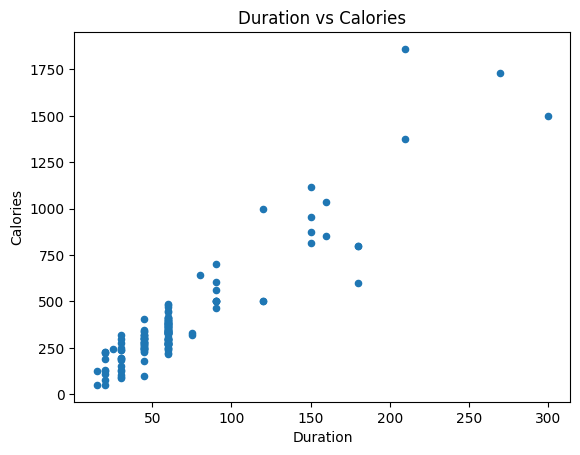

In [32]:
data.plot(x='Duration', y='Calories', kind='scatter')
plt.xlabel('Duration') 
plt.ylabel('Calories') 
plt.title('Duration vs Calories')
plt.show()

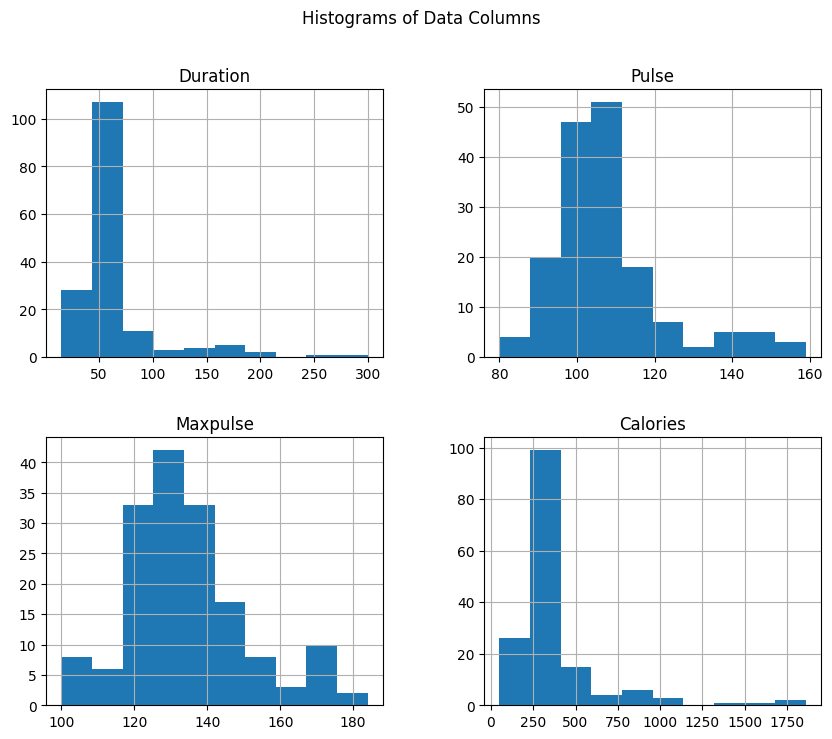

In [33]:
data.hist(figsize=(10, 8))
plt.suptitle('Histograms of Data Columns')
plt.show()

## Regression Analysis: Predicting Calories Burned Based on Duration

Mean Squared Error: 9213.293340520662
R-squared: 0.7181866598928373


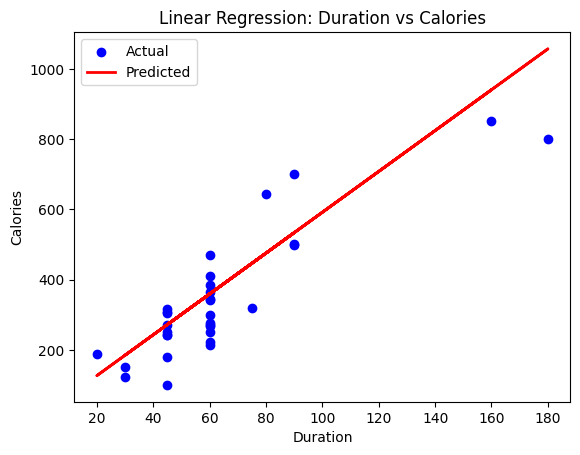

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Drop rows with missing values in 'Calories' column
data_clean = data.dropna(subset=['Calories'])

# Define the independent variable (X) and dependent variable (y)
X = data_clean[['Duration']]
y = data_clean['Calories']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate and print the performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plot the regression line
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Duration')
plt.ylabel('Calories')
plt.title('Linear Regression: Duration vs Calories')
plt.legend()
plt.show()